# Notebook for computing registrations using ANTs from T1 into Std space

In [2]:
# Imports:
import ants
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [3]:
# Parameters: EDIT THESE - TODO: CONVERT INTO ARGPARSE
FS_path = '/usr/pubsw/packages/fsl/fsl-6.0.5/data/standard'
data_path = '/home/student/Practicas/Practicas_SantPau/primeras_pruebas_freesurfer/data/out_recon-all' #Location of the FS registration output
subject_names = ['sub-003S6257'] #NList of subjects names in data_path
T1_path = os.path.join(data_path, subject_names[0], 'mri/T1.mgz') #Must be a FreeSurfer T1
T1Brain_path = os.path.join(data_path, subject_names[0], 'mri/brain.mgz') #Must be a FreeSurfer T1
StdTemplate_path = os.path.join(FS_path, 'MNI152_T1_2mm.nii.gz') #Must be a MNI152 template (FS dir)
StdBrainTemplate_path = os.path.join(FS_path, 'MNI152_T1_2mm_brain.nii.gz') #Must be a MNI152 template (FS dir)

# ANTs parameters
method = 'SyN'

In [4]:
# listdir of data_path
#subject_names = os.listdir(data_path)

In [5]:
# Load necessary files:
T1 = ants.image_read(T1_path)
T1Brain = ants.image_read(T1Brain_path)
StdTemplate = ants.image_read(StdTemplate_path)
StdTemplateBrain = ants.image_read(StdBrainTemplate_path)


In [6]:
# Prepare the ants call:
registered_image = ants.registration(
    fixed=StdTemplate, 
    moving=T1, 
    type_of_transform=method
    )


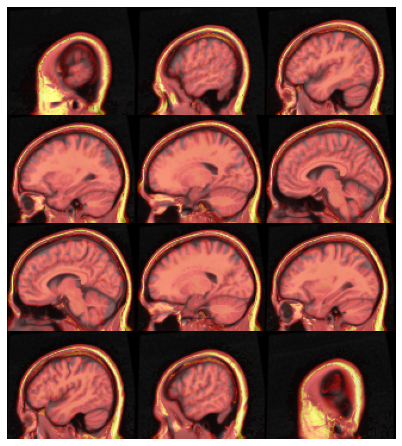

In [7]:
ants.plot(StdTemplate, overlay=registered_image['warpedmovout'], overlay_cmap='hot', overlay_alpha=0.5)

In [8]:
registered_brain_image = ants.registration(
    fixed=StdTemplateBrain, 
    moving=T1Brain, 
    type_of_transform=method
    )

/home/student/.conda/envs/py39/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



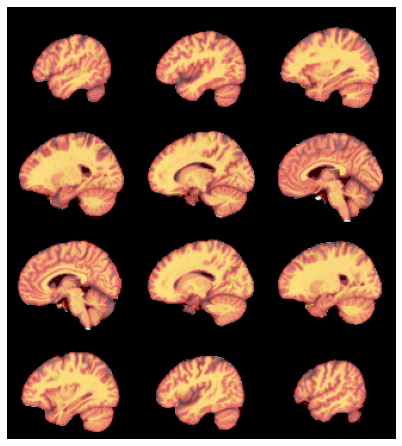

In [9]:
ants.plot(StdTemplateBrain, overlay=registered_brain_image['warpedmovout'], overlay_cmap='hot', overlay_alpha=0.5)

In [ ]:
#TODO: Play with Cost Function -> parameter metric

In [ ]:
#TODO: Compute and save similarity measures

In [ ]:
#TODO: Plot similarity measures

/home/student/.conda/envs/py39/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



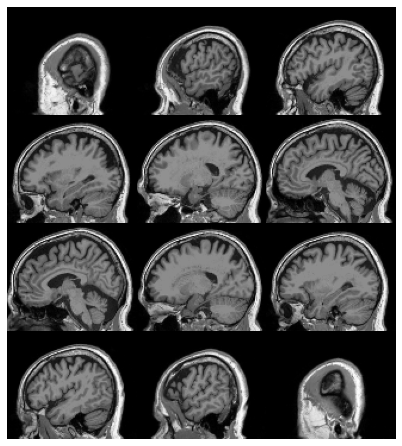

{'segmentation': ANTsImage (RPI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (91, 109, 91)
 	 Spacing    : (2.0, 2.0, 2.0)
 	 Origin     : (-90.0, 126.0, -72.0)
 	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.],
 'probabilityimages': [ANTsImage (RPI)
  	 Pixel Type : float (float32)
  	 Components : 1
  	 Dimensions : (91, 109, 91)
  	 Spacing    : (2.0, 2.0, 2.0)
  	 Origin     : (-90.0, 126.0, -72.0)
  	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.],
  ANTsImage (RPI)
  	 Pixel Type : float (float32)
  	 Components : 1
  	 Dimensions : (91, 109, 91)
  	 Spacing    : (2.0, 2.0, 2.0)
  	 Origin     : (-90.0, 126.0, -72.0)
  	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.],
  ANTsImage (RPI)
  	 Pixel Type : float (float32)
  	 Components : 1
  	 Dimensions : (91, 109, 91)
  	 Spacing    : (2.0, 2.0, 2.0)
  	 Origin     : (-90.0, 126.0, -72.0)
  	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]]}

In [18]:
#TODO: Plot T1 in std space and use STD borders as reference
ants.plot(registered_image['warpedmovout'])

# Get GM and WM boundaries:
mask = ants.get_mask(StdTemplate)
segs = ants.kmeans_segmentation(StdTemplate, k=3, kmask=mask)
segs

/home/student/.conda/envs/py39/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



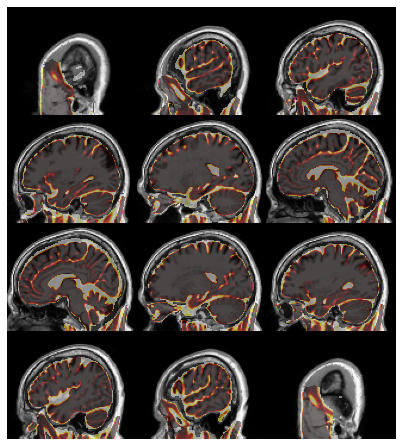

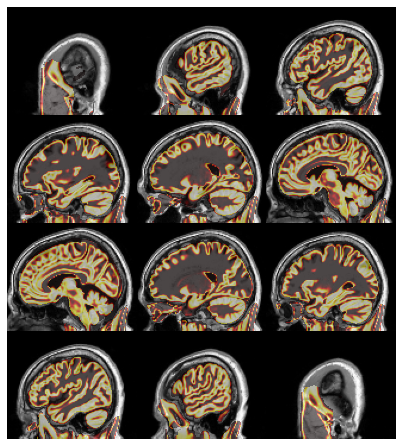

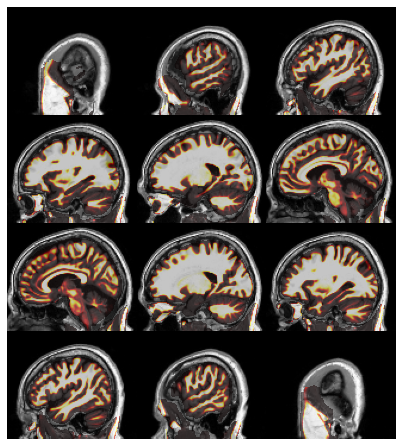

In [22]:
ants.plot(registered_image['warpedmovout'], overlay=segs['probabilityimages'][0], overlay_cmap='hot', overlay_alpha=0.5)
ants.plot(registered_image['warpedmovout'], overlay=segs['probabilityimages'][1], overlay_cmap='hot', overlay_alpha=0.5)
ants.plot(registered_image['warpedmovout'], overlay=segs['probabilityimages'][2], overlay_cmap='hot', overlay_alpha=0.5)

/home/student/.conda/envs/py39/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



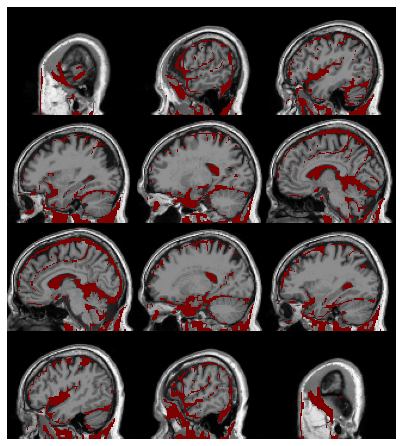

In [45]:
mask_CSF = ants.threshold_image(segs['probabilityimages'][0], 0.1)
ants.plot(registered_image['warpedmovout'], overlay=mask_CSF, overlay_cmap='jet', overlay_alpha=1)

In [ ]:
# Compute image similarity:
